This script plot the diurnal patter of ambient NOx and O3 from monitoring station

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, importlib, sys

sys.path.append('../../code/src')
from extract_aqmd_data import get_hourly_aqmd

In [6]:
df_NOx_pasadena = get_hourly_aqmd("../../data/raw/AQMD/NOX_PICKDATA_2021-12-31_PA.csv")
df_NOx_redlands = get_hourly_aqmd("../../data/raw/AQMD/NOX_PICKDATA_2021-12-31_RL.csv")

df_O3_pasadena = get_hourly_aqmd("../../data/raw/AQMD/OZONE_PICKDATA_2021-12-31_PA.csv")
df_O3_redlands = get_hourly_aqmd("../../data/raw/AQMD/OZONE_PICKDATA_2021-12-31_RL.csv")

In [19]:
df_O3_pasadena = df_O3_pasadena[(df_O3_pasadena['Date']>='2021-07-10')&
                                (df_O3_pasadena['Date']<='2021-10-31')]
df_NOx_pasadena = df_NOx_pasadena[(df_NOx_pasadena['Date']>='2021-07-10')&
                                (df_NOx_pasadena['Date']<='2021-10-31')]

df_O3_redlands = df_O3_redlands[(df_O3_redlands['Date']>='2021-07-16')&
                                (df_O3_redlands['Date']<='2021-10-31')]
df_NOx_redlands = df_NOx_redlands[(df_NOx_redlands['Date']>='2021-07-16')&
                                (df_NOx_redlands['Date']<='2021-10-31')]

df_O3_pasadena['Value'] = df_O3_pasadena['Value']*1e3
df_O3_redlands['Value'] = df_O3_redlands['Value']*1e3
df_NOx_pasadena['Value'] = df_NOx_pasadena['Value']*1e3
df_NOx_redlands['Value'] = df_NOx_redlands['Value']*1e3

In [34]:
# sun rise time
sun_rise_pasadena = [5.93, 6.23, 6.6, 6.967]
sun_rise_redlands = [5.867, 6.183, 6.53,6.9]

In [59]:
# add basecase chamber O3
df_chamber_pasadena = pd.read_csv('../../data/final/chamber_measurement_10min_avg_pasadena.csv')
df_chamber_redlands = pd.read_csv('../../data/final/chamber_measurement_10min_avg_redlands.csv')

df_chamber_pasadena['Date'] = pd.to_datetime(df_chamber_pasadena['Date'])
df_chamber_pasadena = df_chamber_pasadena[df_chamber_pasadena['Bag']=='bag2']
df_bag2_pasadena = df_chamber_pasadena.groupby([df_chamber_pasadena['Date'].dt.month,
                             df_chamber_pasadena['UV_time']]).\
    agg({'O3':'mean'}).reset_index()

df_chamber_redlands['Date'] = pd.to_datetime(df_chamber_redlands['Date'])
df_chamber_redlands = df_chamber_redlands[df_chamber_redlands['Bag']=='bag2']
df_bag2_redlands = df_chamber_redlands.groupby([df_chamber_redlands['Date'].dt.month,
                             df_chamber_redlands['UV_time']]).\
    agg({'O3':'mean'}).reset_index()

df_bag2_pasadena = df_bag2_pasadena[df_bag2_pasadena['UV_time']<180]
df_bag2_redlands = df_bag2_redlands[df_bag2_redlands['UV_time']<180]

#### Pasadena

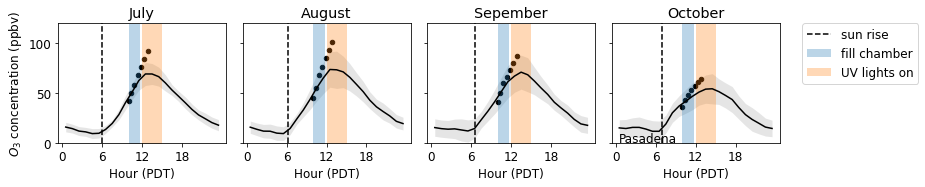

In [94]:
df_plot = df_O3_pasadena.groupby([df_O3_pasadena['Date'].dt.month, 
                                  df_O3_pasadena['Hour']]).\
            agg({'Value':['mean','std']}).reset_index()

# plot O3 
fig, ax = plt.subplots(1,4, figsize=(13,2.5), sharey=True, sharex=True)
plt.rcParams.update({'font.size': 12})

for i in range(4):
    month = [7,8,9,10]
    month_name = ['July','August','Sepember','October']
    df_subplot = df_plot[df_plot['Date']==month[i]]
    
    # plot diurnal O3
    ax[i].plot(df_subplot['Hour']+0.5, df_subplot['Value']['mean'], color='k')
    ax[i].fill_between(df_subplot['Hour']+0.5, 
                       df_subplot['Value']['mean']-df_subplot['Value']['std'], 
                       df_subplot['Value']['mean']+df_subplot['Value']['std'], 
                       color='grey', alpha=0.2, linewidth=0)

    # plot chamber O3
    ax[i].scatter(df_bag2_pasadena[df_bag2_pasadena['Date']==month[i]]['UV_time']/60 + 10,
                  df_bag2_pasadena[df_bag2_pasadena['Date']==month[i]]['O3'], 
                  color='k', s=20)
    
    # plot vertical lines
    ax[i].axvline(x=sun_rise_pasadena[i], color='k', linestyle='--', label='sun rise')
    ax[i].fill_betweenx(np.arange(-20,120), 10, 12-0.3, color='#1f77b4', alpha=0.3, linewidth=0, label='fill chamber')
    ax[i].fill_betweenx(np.arange(-20,120), 12, 12+3, color='#ff7f0e', alpha=0.3, linewidth=0, label='UV lights on')
    
    ax[i].set_title(month_name[i])
    ax[i].set_xticks(np.arange(0,24,6))
    ax[i].set_xlabel('Hour (PDT)')
    ax[i].set_ylim(0,120)
    ax[i].set_aspect(0.15)


ax[0].set_ylabel('$O_3$ concentration (ppbv)')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()

plt.text(0.5, 1.05, 'Pasadena')
plt.savefig('../../result/diurnal_O3_pasadena.png', dpi=1200, bbox_inches='tight')

#### Redlands

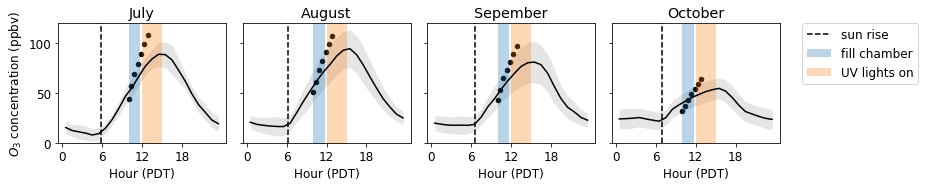

In [95]:
df_plot = df_O3_redlands.groupby([df_O3_redlands['Date'].dt.month, 
                                  df_O3_redlands['Hour']]).\
            agg({'Value':['mean','std']}).reset_index()

# plot O3 
fig, ax = plt.subplots(1,4, figsize=(13,2.5), sharey=True, sharex=True)
plt.rcParams.update({'font.size': 12})

for i in range(4):
    month = [7,8,9,10]
    month_name = ['July','August','Sepember','October']
    df_subplot = df_plot[df_plot['Date']==month[i]]

    # plot diurnal O3
    ax[i].plot(df_subplot['Hour']+0.5, df_subplot['Value']['mean'], color='k')
    ax[i].fill_between(df_subplot['Hour']+0.5, 
                       df_subplot['Value']['mean']-df_subplot['Value']['std'], 
                       df_subplot['Value']['mean']+df_subplot['Value']['std'], 
                       color='grey', alpha=0.2, linewidth=0)
    
    # plot chamber O3
    ax[i].scatter(df_bag2_redlands[df_bag2_redlands['Date']==month[i]]['UV_time']/60 + 10,
                  df_bag2_redlands[df_bag2_redlands['Date']==month[i]]['O3'], 
                  color='k', s=20)
    
    # plot vertical line
    ax[i].axvline(x=sun_rise_redlands[i], color='k', linestyle='--', label='sun rise')
    ax[i].fill_betweenx(np.arange(-20,120), 10, 12-0.3, color='#1f77b4', alpha=0.3,
                         linewidth=0, label='fill chamber')
    ax[i].fill_betweenx(np.arange(-20,120), 12, 12+3, color='#ff7f0e', alpha=0.3,
                         linewidth=0, label='UV lights on')
    
    ax[i].set_title(month_name[i])
    ax[i].set_xticks(np.arange(0,24,6))
    ax[i].set_xlabel('Hour (PDT)')
    ax[i].set_ylim(0,120)
    ax[i].set_aspect(0.15)


ax[0].set_ylabel('$O_3$ concentration (ppbv)')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.savefig('../../result/diurnal_O3_redlands.png', dpi=1200, bbox_inches='tight')
